# [IAPR 2019:][iapr2019] Lab 1 ‒  Image segmentation

**Author:** Elisabetta Pagliara and last name  
**Due date:** 04.04.2019

[iapr2019]: https://github.com/LTS5/iapr-2019

## Extract relevant data
We first need to extract the `lab-01-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-01-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1: Brain segmentation

Your goal: compute the size of the brain (in pixels) in a 2D image of a human head taken by Magnetic Resonance Imaging (MRI).
* Try as many methods as you can, the more the better.
* At least region growing and contour detection.

### 1.1 Brain image visualization

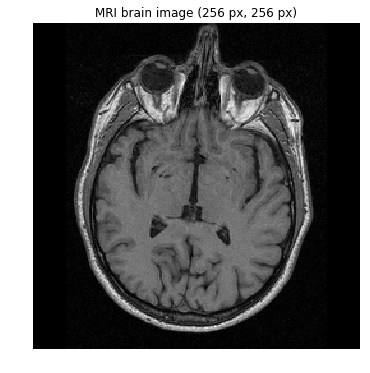

In [230]:
import skimage.io

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

# Load image
data_path = os.path.join(data_base_path, data_folder)
brain_im = skimage.io.imread(os.path.join(data_path, 'brain-slice40.tiff'))
im_h, im_w = brain_im.shape

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(brain_im, cmap='gray')
ax.set_title('MRI brain image ({} px, {} px)'.format(im_h, im_w))
ax.axis('off')
plt.show()

### 1.2 Region growing
All the pixel connected in the foreground are object!


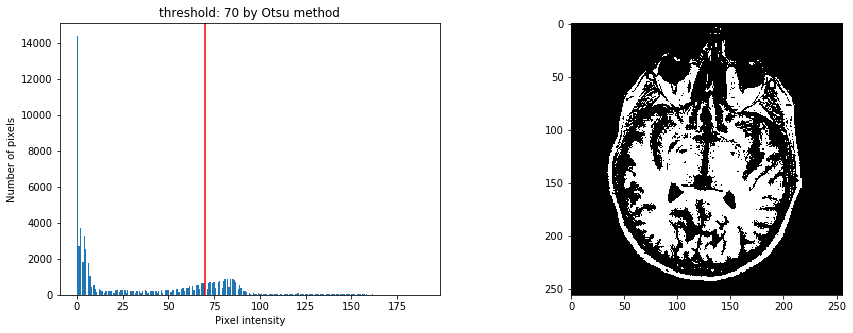

In [138]:
#SECOND METHOD: GAUSSIAN METHOD IMPLEMENTED BY OTSU--> 
from skimage.filters import threshold_otsu
import numpy as np


thresh = threshold_otsu(brain_im)
thresh=70
binary =np.where( brain_im > 70,256,0)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(brain_im.ravel(), bins=256)
plt.axvline(thresh, color='r')
plt.title('threshold: {} by Otsu method'.format(thresh))
plt.xlabel('Pixel intensity')
plt.ylabel('Number of pixels')
plt.subplot(1,2,2)
plt.imshow(binary,cmap='gray')
plt.show()


Please select the initial seed point: [150, 150]


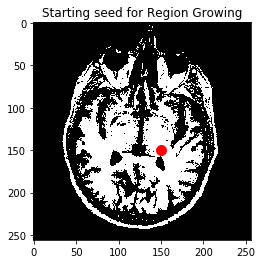

In [13]:
# region growing in the foreground starting form a seed:

pseed = [150,150] #of course let's set a point inside your region of interest !!
print ('\nPlease select the initial seed point: {}'.format(pseed))
plt.imshow(binary,cmap='gray')
plt.scatter(x=pseed[0],y=pseed[1],c='r',s=100)
plt.title('Starting seed for Region Growing')
plt.show()

In [23]:
def neighboorhood(pseed,image):#consider the case where the pixel doen't hot have 8 neighboorhod !!!
    
    #8 is fixed because 8 connectivity
    t=5
    if (image[pseed[0],pseed[1]]>=np.mean(image[pseed[0]-t*1:pseed[0]+t*1,pseed[1]-t*1:pseed[1]+t*1])):
           return True 
    else:
          return False
        


In [15]:
def get_position(pseed,binary,image_growing_contour):
    #8 connectivity
    vector_position=[]
    if (binary[pseed[0]+1,pseed[1]]==256) & (image_growing_contour[pseed[0]+1,pseed[1]]!=True ):
        vector_position.append((pseed[0]+1,pseed[1]))
        
    if(binary[pseed[0]-1,pseed[1]]==256) & (image_growing_contour[pseed[0]-1,pseed[1]]!=True ):
        vector_position.append((pseed[0]-1,pseed[1]))
        
    if(binary[pseed[0],pseed[1]+1]==256) & (image_growing_contour[pseed[0],pseed[1]+1]!=True ):
        vector_position.append((pseed[0],pseed[1]+1))
        
    if(binary[pseed[0],pseed[1]-1]==256) & (image_growing_contour[pseed[0],pseed[1]-1]!=True ):
        vector_position.append((pseed[0],pseed[1]-1))
        
    if(binary[pseed[0]+1,pseed[1]+1]==256) & (image_growing_contour[pseed[0]+1,pseed[1]+1]!=True ):
        vector_position.append((pseed[0]+1,pseed[1]+1))
        
    if(binary[pseed[0]-1,pseed[1]-1]==256) & (image_growing_contour[pseed[0]-1,pseed[1]-1]!=True ):
        vector_position.append((pseed[0]-1,pseed[1]-1))
        
    if(binary[pseed[0]+1,pseed[1]-1]==1) & (image_growing_contour[pseed[0]+1,pseed[1]-1]!=True ):
        vector_position.append((pseed[0]+1,pseed[1]-1))
        
    if(binary[pseed[0]-1,pseed[1]+1]==1) & (image_growing_contour[pseed[0]-1,pseed[1]+1]!=True ):
        vector_position.append((pseed[0]-1,pseed[1]+1))
        
    return vector_position
    


In [16]:
def remove_duplicates(duplicate):
    
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list
    

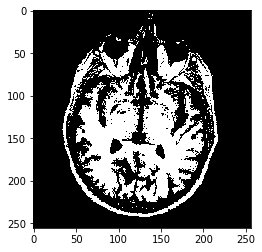

In [18]:
plt.imshow(binary,cmap='gray')

In [24]:
import numpy as np
image_growing_contour=np.zeros((binary.shape[0],binary.shape[1]))
n=8#implemented like this no possibility to change    
x,y=pseed[0],pseed[1]
image_growing_contour[x,y]=True if neighboorhood(pseed,binary) else print('Choose a new point in the foreground !')
motion_vector=get_position(pseed,binary,image_growing_contour)
motion_vector_update=[]

k=0
#motion in all the positions
while(len(motion_vector)-1>0):
    k+=1
    print('iteration :{}'.format(k))
    for i in range(len(motion_vector)-1):
        if neighboorhood(motion_vector[i],binary):
            image_growing_contour[motion_vector[i][0],motion_vector[i][1]]=True   
            increase_position=get_position(motion_vector[i],binary,image_growing_contour)
           # clean_position=clean_duplicates(increase_position,motion_vector)
            motion_vector_update=motion_vector_update+((increase_position))
            
            
    motion_vector=remove_duplicates(motion_vector_update)
    motion_vector_update=[]
        
    #solve border motive    

iteration :1
iteration :2
iteration :3
iteration :4
iteration :5
iteration :6
iteration :7
iteration :8
iteration :9
iteration :10
iteration :11
iteration :12
iteration :13
iteration :14
iteration :15
iteration :16
iteration :17
iteration :18
iteration :19
iteration :20
iteration :21
iteration :22
iteration :23
iteration :24
iteration :25
iteration :26
iteration :27
iteration :28
iteration :29
iteration :30
iteration :31
iteration :32
iteration :33
iteration :34
iteration :35
iteration :36
iteration :37
iteration :38
iteration :39
iteration :40
iteration :41
iteration :42
iteration :43
iteration :44
iteration :45
iteration :46
iteration :47
iteration :48
iteration :49
iteration :50
iteration :51
iteration :52
iteration :53
iteration :54
iteration :55
iteration :56
iteration :57
iteration :58
iteration :59
iteration :60
iteration :61
iteration :62
iteration :63
iteration :64
iteration :65
iteration :66
iteration :67
iteration :68
iteration :69
iteration :70
iteration :71
iteration :72
i

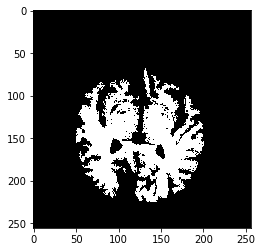

In [25]:
plt.imshow(image_growing_contour,cmap='gray')

### 1.3 Contour detection


In [195]:
from skimage.filters import roberts, sobel
from skimage import measure
import cv2
import scipy


edges = cv2.Canny(brain_im,70,80)

#erosion_brain=scipy.ndimage.binary_closing(edges, structure=np.ones((1,2))).astype('uint8')

ret, markers = cv2.connectedComponents(edges)

#marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 
#Get label of largest component by area
#largest_component = np.argmax(marker_area)+1 #Add 1 since we dropped zero above                        
#Get pixels which correspond to the brain
#brain_mask = markers==largest_component

brain_out = brain_im.copy()
#In a copy of the original image, clear those pixels that don't correspond to the brain


In [196]:
brain_im_threhsold[edges==0]=0

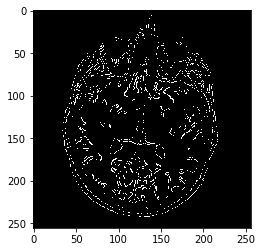

In [197]:
plt.imshow(brain_im_threhsold,cmap='gray')

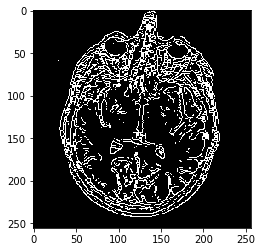

In [193]:
plt.imshow(erosion_brain,cmap='gray')

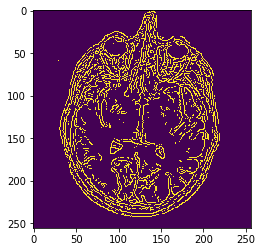

In [194]:
plt.imshow(edges)

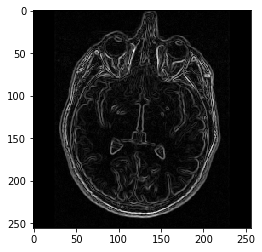

In [206]:
edge_sobel = sobel(brain_im)#, not that good, concolution in 2 direction
plt.imshow(edge_sobel,cmap='gray')

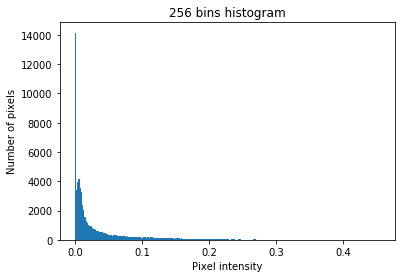

In [201]:
plt.hist(edge_sobel.ravel(), bins=256)
plt.xlabel('Pixel intensity')
plt.ylabel('Number of pixels')
plt.title('256 bins histogram')
plt.show()

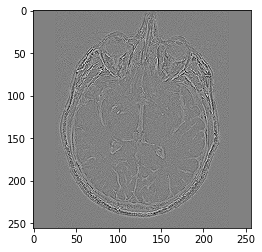

In [209]:
#laplace , second derivative
img = cv2.Laplacian(brain_im, cv2.CV_64F)
plt.imshow(img,cmap='gray')

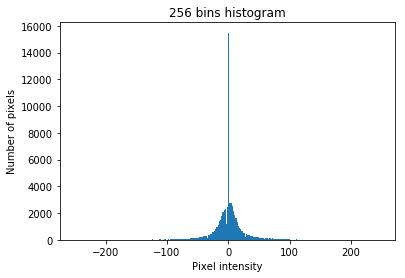

In [211]:
plt.hist(img.ravel(), bins=256)
plt.xlabel('Pixel intensity')
plt.ylabel('Number of pixels')
plt.title('256 bins histogram')
plt.show()

### 1.4 Thresholding


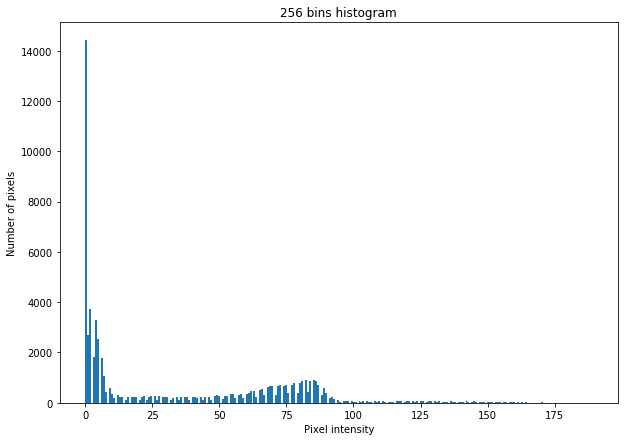

In [212]:
#Let's start looking at a simple histogram representation:
plt.figure(figsize=(10,7))
plt.hist(brain_im.ravel(), bins=256)
plt.xlabel('Pixel intensity')
plt.ylabel('Number of pixels')
plt.title('256 bins histogram')
plt.show()

Looking at the bimodal histogram, we could approximate the shape of the two peaks as two gaussian distributions. What could we do to find the optimal threshold?
1. If one knows regions that are obviously in the background, we can easily estimate its distribution
2. We can define a model (e.g. Gaussian) and fit curves to the histogram


In [213]:
data=np.concatenate((brain_im.ravel().reshape(-1,1)))

In [214]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 2, tol=0.000001,max_iter=200)
gmm.fit(np.expand_dims(data, 1))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=200,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=1e-06, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

Gaussian 1: μ = 2.0, σ = 2.4, weight = 0.48
Gaussian 2: μ = 6.6e+01, σ = 3.1e+01, weight = 0.52


/Users/elisabetta/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


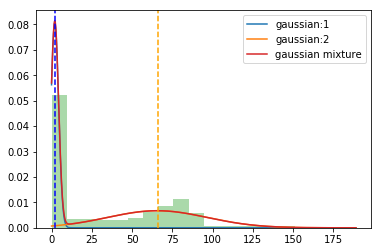

In [219]:
import scipy.stats 
import seaborn as sns
x = np.linspace(np.min(data), np.max(data), 2000) 
Gaussian_nr = 1
for mu, sd, p in zip(gmm.means_.flatten(), np.sqrt(gmm.covariances_.flatten()), gmm.weights_):
    print('Gaussian {:}: μ = {:.2}, σ = {:.2}, weight = {:.2}'.format(Gaussian_nr, mu, sd, p))
    g_s = scipy.stats.norm(mu, sd).pdf(x) * p
    plt.plot(x, g_s, label='gaussian:{}'.format(Gaussian_nr));
    Gaussian_nr += 1
sns.distplot(data, bins=20, kde=False, norm_hist=True)
gmm_sum = np.exp([gmm.score_samples(e.reshape(-1, 1)) for e in x]) #gmm gives log probability, hence the exp() function
plt.plot(x, gmm_sum, label='gaussian mixture')
plt.axvline(2, color="b", linestyle="--");
plt.axvline(66, color="orange", linestyle="--");
plt.legend()

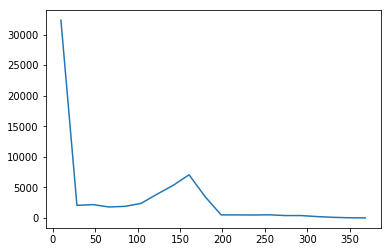

In [220]:
x,y=np.histogram(brain_im.ravel(),bins=20)
z=np.zeros((20,1))
for i in range(y.size-1):
    z[i]=np.mean(y[i]+y[i+1]) 


plt.plot(z,x)
#we cna see an optimal threhsold is arounf 70

In [ ]:
#t opt is the average of the two mean !!

In [221]:
threshold=round(np.mean(gmm.means_.flatten()))
threshold

34.0

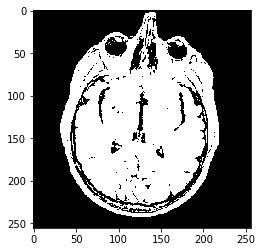

In [222]:
brain_im_Gaussian=np.where(brain_im>threshold,256,0)
plt.imshow(brain_im_Gaussian,cmap='gray')
#by the way it's really hard to find the brain, but it's optimum for division foreground/backgrouns

In [78]:
brain_im[150,150:] #looking at the values of pixel in the region i'm interested in 

array([ 79,  82,  79,  86,  87,  83,  84,  80,  85,  85,  84,  83,  86,
        82,  84,  85,  84,  77,  81,  89,  75,  78,  76,  68,  77,  81,
        83,  86,  85,  86,  88,  89,  85,  81,  73,  66,  69,  55,  48,
        65,  68,  79,  75,  73,  82,  82,  82,  72,  73,  28,  21,  25,
        17,  58,  20,  14,  54,  62,  63,  65,  65,  53,  73, 101, 146,
       145, 104,  57,  55,  26,   9,   1,   2,   2,   7,   3,   2,   5,
         6,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

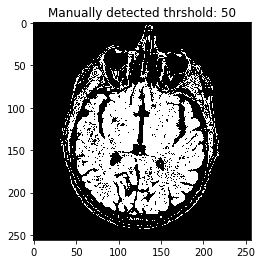

In [223]:
#FIRST: clearly we know that all teh background is zero, so just consider a good positive threshold :
import numpy as np
brain_im_threhsold=np.where((brain_im>60) & (brain_im<90),256,0)
plt.imshow(brain_im_threhsold,cmap='gray')
plt.title('Manually detected thrshold: {}'.format(50))
plt.show()

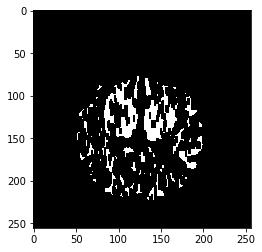

In [224]:
import scipy
erosion_brain=scipy.ndimage.binary_erosion(brain_im_threhsold, structure=np.ones((8,3))).astype(brain_im_threhsold.dtype)
plt.imshow(erosion_brain,cmap='gray')

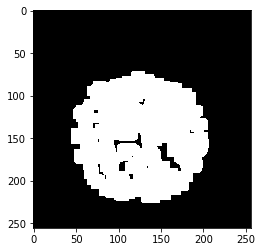

In [225]:
dilation_brain=scipy.ndimage.binary_dilation(erosion_brain, structure=np.ones((10,15))).astype(brain_im_threhsold.dtype)
plt.imshow(dilation_brain,cmap='gray')


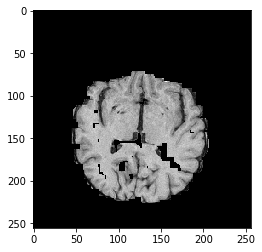

In [229]:
brain_im2=brain_im.copy()
brain_im2[dilation_brain==0] = (0)
plt.imshow(brain_im2,cmap='gray')
#a really good representation that need the attention of the operator.

Additionally, it does not define objects, but only separates background from foreground. The foreground does not necessarily define the objects, region growing can solve this problem.

# 1.5 Splitting and merge:


In [586]:
def uniform_criteria(index,threshold,image):
    image=image[index[0]:index[1],index[2]:index[3]]
    if np.std(image)>=threshold:
        return True   
    else :
        return False

In [577]:
def splitting_image_later(index):
    x=int((np.abs(index[1]-index[0])/2))
    y=int((np.abs(index[3]-index[2])/2))
    
    matrix1=(index[0],index[0]+x,index[2],index[2]+y)
    matrix2=(index[0],index[0]+x,index[2]+y,index[3])
    matrix3=(index[0]+x,index[1],index[2],index[2]+y)
    matrix4=(index[0]+x,index[1],index[2]+y,index[3])
    
    return matrix1, matrix2, matrix3, matrix4

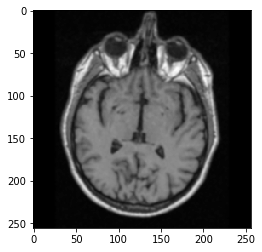

In [889]:
import cv2
#Then we blur the image to remove various blemishes, that could potentially halt the splitting phase
brain_blurred=cv2.GaussianBlur(brain_im, (5,5), 0, 0);
plt.imshow(brain_blurred,cmap='gray')
brain=np.zeros((np.shape(brain_blurred)[0],np.shape(brain_blurred)[1]))

#splitting first all image
result2=[]
k=1
threshold=15
index=(0,np.shape(brain_blurred[0])[0],0,np.shape(brain_blurred[1])[0])
if uniform_criteria(index,threshold,brain_blurred):
    
    result=splitting_image_later(index)
    #keep spitting
    while (len(result)!=0):#one matrix defines just by one pixel for just one image-> simple case of square matrix
        for i in range(len(result)):#4 or more output matrix
                if  (uniform_criteria(result[i],threshold,brain_blurred)):
                    result2= result2+list(splitting_image_later(result[i]))#new dimension
                
                else:#label the input image

                    brain[result[i][0]:result[i][1],result[i][2]:result[i][3]]=k
                    k+=1#number of splitting

        result=result2
        result2=[]

else:
    print('threshold too high')

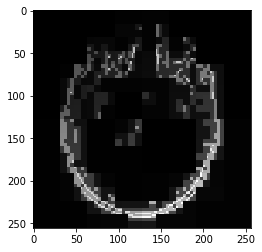

In [890]:
plt.imshow(brain,cmap='gray')#result of splitting, the color indicates the correspondent label

In [920]:
def get_neighbourhood(i,row,column,brain,merging,brain_blurred,threshold):
    #4 neighboorhood
    if np.shape(row)==1:
        x=np.abs(row[0])
        #y=np.abs(column[0])
    else:
        
        x=np.abs(row[0]-row[-1])
        #y=np.abs(column[0]-column[-1])
        
    
    for j in range(x):
        if (row[0]-1)  >=0:#upper search
            value=brain[row[0]-1,column[0]+j]
            merging=merging_f(brain_blurred[brain==i],brain_blurred[brain==value],threshold,merging,i,value,brain)
            
        if (row[-1]+1<=brain.shape[0]-1):#botton search
            value=brain[row[-1]+1,column[0]+j]
            merging=merging_f(brain_blurred[brain==i],brain_blurred[brain==value],threshold,merging,i,value,brain)
            
        if (column[0]-1>=0):#left
            value=brain[row[0]+j,column[0]-1]
            merging=merging_f(brain_blurred[brain==i],brain_blurred[brain==value],threshold,merging,i,value,brain)
            
        if (column[-1]+1<=brain.shape[1]-1):#right
            value=brain[row[0]+j,column[-1]+1]
            merging=merging_f(brain_blurred[brain==i],brain_blurred[brain==value],threshold,merging,i,value,brain)
            
    return merging

def merging_f(matrix1,matrix2,threshold,merging,i,value,brain):
    total_matrix=np.vstack((matrix1.reshape((-1,1)),matrix2.reshape((-1,1))))
    
    if np.std(total_matrix)<threshold :
        merging[brain==i]=0
        merging[brain==value]=0
    else:
        merging[brain==i]=1 
        merging[brain==value]=1 
    return merging

In [932]:
#merging
merging=np.zeros((np.shape(brain_blurred)[0],np.shape(brain_blurred)[1]))

for i in range(np.shape(np.unique(brain))[0]-1):
    row,column=np.where(brain==i+1)
    merging=get_neighbourhood(i+1,row,column,brain,merging,brain_blurred,threshold)
       
        

        
#finding all the combinations!!

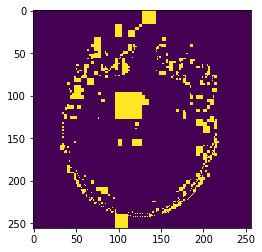

In [933]:
plt.imshow(merging)

# 1.6 Active contourns

In [939]:
from skimage.filters import gaussian
from skimage.segmentation import active_contour

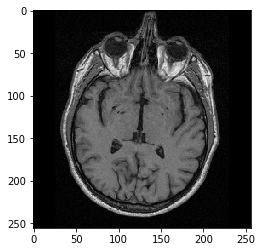

In [975]:
plt.imshow(brain_im,cmap='gray')

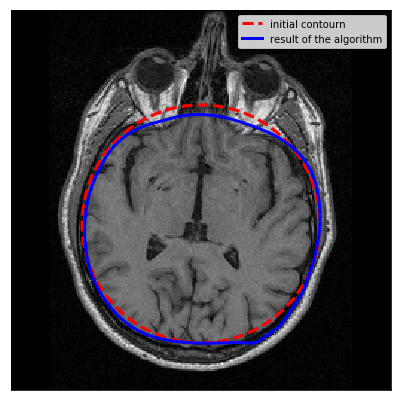

In [974]:
s = np.linspace(0, 2*np.pi, 400)
x = 128+ 80*np.cos(s)
y = 144+80*np.sin(s)
init = np.array([x, y]).T

snake = active_contour(gaussian(brain_im, 3),
                       init, alpha=0.015, beta=10, gamma=0.001)


fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(brain_im, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, brain_im.shape[1], brain_im.shape[0], 0])
plt.legend(['initial contourn','result of the algorithm'])
plt.show()

preatty low result and resolution

## Part 2: Save the bees !

Varroa mites are recognized as the biggest pest to honey bees worldwide, and are believed to be the single largest contributing factor in the modern-day decline of honey bees due to their ability to transmit diseases, resulting in death or severe deformity of the pupae. 

Detecting and quantifying the presence of Verroa in a beehive is therefore crucial to treat the infection appropriately and as early as possible, and image analysis appears very useful in this problem.

![Varroa Mite](https://lts5www.epfl.ch/wp-content/uploads/2018/07/varroa-2.jpg)



### 2.1 Introduction to Project

You will find hereafter a set of 4 images taken under real conditions. In this task you will be ask to:
1. Count the number of Varroa on each picture
2. Determine the Intersection over Union of the detected patterns w.r.t. the ground truth
3. Estimate the Precision, Recall and F1-score at two different IoU thresholds $T = {0.5 \text{, and } 0.9}$


**Note** 

Try to have the same routine(s) running on the four images, and giving (approximatively) the same results. The routine(s) that you will write for this part will be useful for the final project as well, so pay special attention to it.

#### Vocabulary


* **IoU**: Let $A$ be the ground truth area and $B$ the predicted one. the intersection over union (IoU) is given as:
$$IoU(A,B) = \frac{A \cap B}{A \cup B} = \frac{\text{Area of Overlap}}{\text{Area of Union}}$$
Let $T$ be a scalar in the interval $[0, 1]$, then $B$ will be considered as a true positive (TP) if and only if $IoU(A,B) \ge T$. As a results, we can evaluate the performance of our detection with different values of $T$. The larger $T$ is, the more constraining is our condition.


* **Precision**: The precision is given as:
$$precision = \frac{tp}{tp + fp}$$
where $tp$ is the number of true positives and $fp$ the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.


* **Recall**: The recall is given as:
$$precision = \frac{tp}{tp + fn}$$
where $tp$ is the number of true positives and $fn$ the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.


* **F1-score**: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
$$F1 = \frac{2 \cdot precision \cdot recall}{precision + recall}$$


**FAQ**

Q: What to do if I have multiple ground truth $A_i$ and candidates $B_j$ and want to find the best set $(i,j)$ such that $(i, j) = \arg\max_{i,j} IoU(A_i, B_j)$ ? 

A: Here, we recommend to use a brute force approach. It corresponds to compute $IoU(A, B)$ for every possible pairs (i,j) and keep the pair with the highest $IoU$. Note that a candidate $B_j$ can **only** be matched to **one** ground truth area $A_i$.

Here, we visualize the 4 images for our patern detection

In [976]:
# Load images
im_names = ['varroa-01', 'varroa-02', 'varroa-03', 'varroa-04']
filenames = [os.path.join(data_path, name) + '.jpg' for name in im_names]
ic = skimage.io.imread_collection(filenames)
print('Number of images: ', len(ic))

Number of images:  4


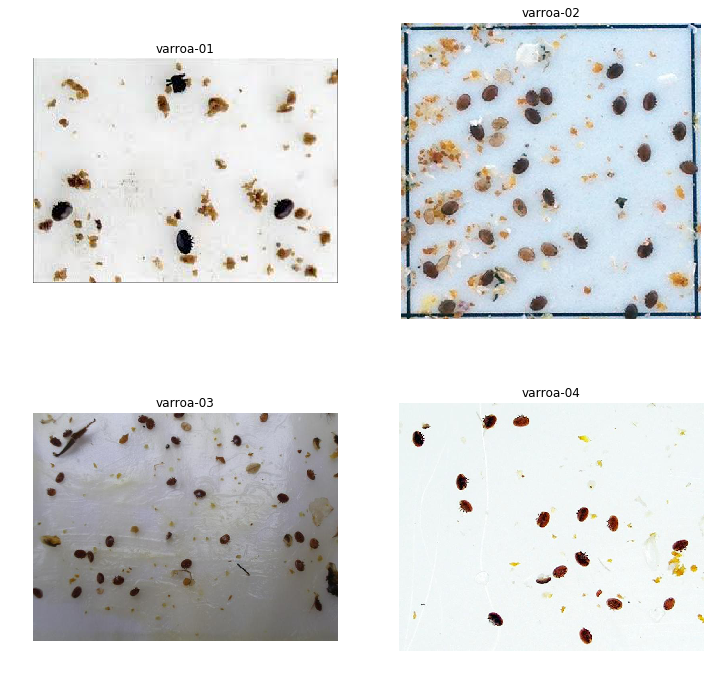

In [977]:
# Plot images
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
for ax, im, nm in zip(axes.ravel(), ic, im_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
plt.show()

We can as well add the groud truth label that are stored in the corresponding XML files. Each xml file stores the position of the varroa on the image as :

```xml
<annotation>
	<object>
		<name>Varroa</name>
		<difficult>0</difficult>
		<bndbox>
			<xmin>14</xmin>
			<ymin>117</ymin>
			<xmax>33</xmax>
			<ymax>137</ymax>
		</bndbox>
	</object>
	<object>
		...
	</object>
	...
</annotation>
```
The block `object` defines the attributes of the varroa. `name` is the definition of the object class (always varroa). `bndbox` is the definition of the bounding box. To simplify your task, we implemented a function named `parse_file` that returns an array with the bounding box of the varroa expressed as `(x, y, width, heigth)` which corresponds to `(xmin, ymin, xmax-xmin, ymax-ymin)`

In [978]:
import xml.etree.ElementTree as ET

def parse_file(filename):
    """ Parse a PASCAL VOC xml file """
    tree = ET.parse(filename)
    objects = []
    for obj in tree.findall('object'):
        obj_struct = {}
        obj_struct['name'] = obj.find('name').text
        bbox = obj.find('bndbox')
        obj_struct['bbox'] = [int(float(bbox.find('xmin').text)),
                              int(float(bbox.find('ymin').text)),
                              int(float(bbox.find('xmax').text))-int(float(bbox.find('xmin').text)),
                              int(float(bbox.find('ymax').text))-int(float(bbox.find('ymin').text))]
        objects.append(obj_struct)

    return objects

In [979]:
annotations_xmls = [parse_file(os.path.join(data_path, name) + '.xml') for name in im_names]

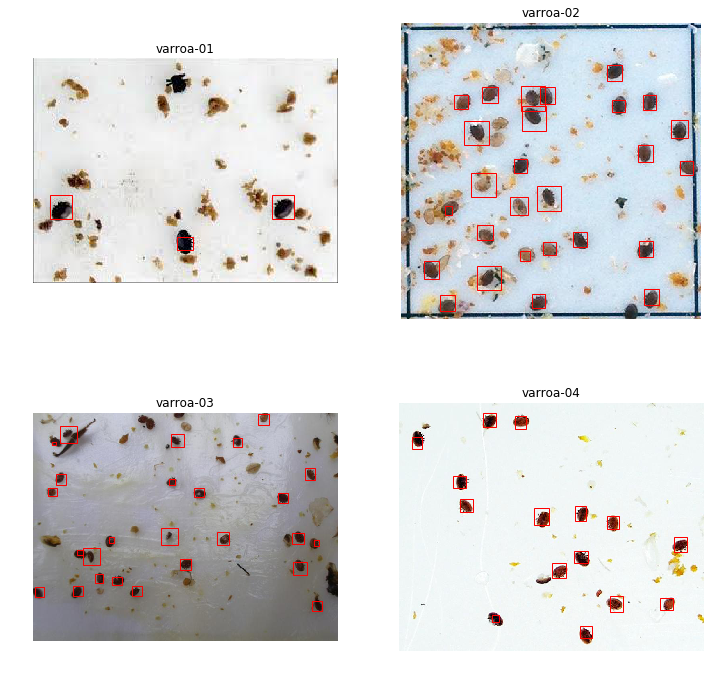

In [30]:
# Plot images
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
for ax, im, nm, annotations in zip(axes.ravel(), ic, im_names, annotations_xmls):
    # Iterate over annotations
    for anno in annotations:
        rect = patches.Rectangle((anno['bbox'][0], anno['bbox'][1]), anno['bbox'][2], anno['bbox'][3],
                linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
    
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
plt.show()

### 2.2 Count the number of Varroa on each picture

Add your implementation and discussion

Hint: `skimage.measure.label` might be useful to label the thresholded image

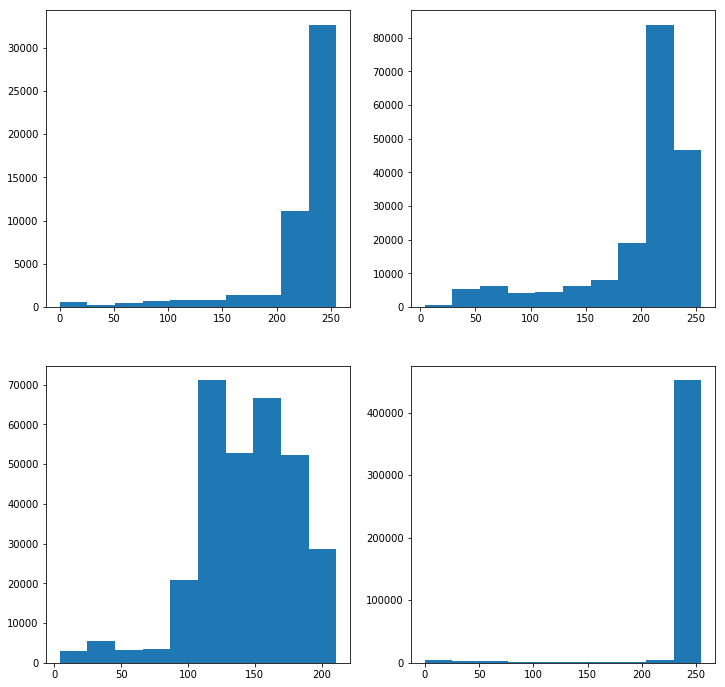

In [1026]:
#gray scale, threhsolding, #label #counting
from skimage import io
from skimage.filters import threshold_otsu
import numpy as np
import cv2
from skimage import measure
bees_count=np.zeros((4,1))
i=0
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
for ax, im, nm, annotations in zip(axes.ravel(), ic, im_names, annotations_xmls):
    
    img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    ax.hist(img.ravel())
    

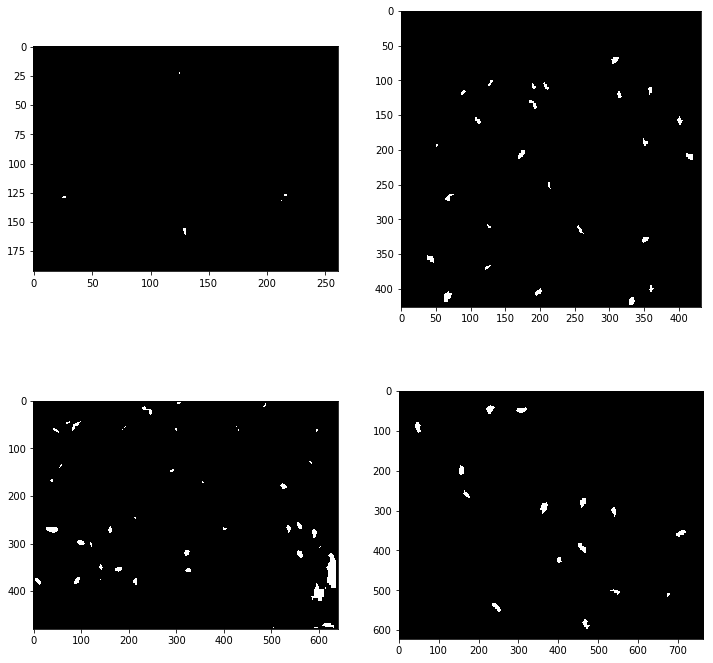

In [1040]:
#50 it's a good threhsold
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
bees_count=np.zeros((4,1))
i=0
area=[]
for ax, im, nm, annotations in zip(axes.ravel(), ic, im_names, annotations_xmls):
   
    img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    thresh = 100
    binary =np.where( img > thresh,0,256)
    #ax.imshow(binary, cmap='gray')
    erosion_brain=scipy.ndimage.binary_erosion(binary, structure=np.ones((8,10))).astype('uint8')
    ax.imshow(erosion_brain,cmap='gray')
    bees_count[i]=np.shape(np.unique(measure.label(erosion_brain,background=0)))[0]-1
    i+=1
    label_image=measure.label(erosion_brain,background=0)
    area.append(np.where(label_image>0))

In [1041]:
bees_count

array([[ 5.],
       [25.],
       [43.],
       [17.]])

### 2.3 IoU of the detected pattern w.r.t. the ground truth

Add your implementation and discussion

Hint: `skimage.measure.regionprops` implements a large variety of descriptors

In [1061]:
i=0
areaTrue=[]
for ax, im, nm, annotations in zip(axes.ravel(), ic, im_names, annotations_xmls):
    # Iterate over annotations
    for anno in annotations:
        areaTrue.append((anno['bbox'][0], anno['bbox'][1]),np.abs( anno['bbox'][2], anno['bbox'][3]))
    

### 2.4 Precision, Recall and F1-score at two different IoU thresholds

Add your implementation and discussion